# Area Comparison for Performance Analysis

In [1]:
# Import libraries

from utilities import *

import fiona
import rasterio
import gdal
from rasterio.mask import mask
import os
from rasterio import plot
from glob import glob
import geopandas as gpd
import numpy as np
from shapely.geometry import box
from shapely.geometry import shape

from matplotlib import pyplot as plt

In [2]:
#Paths to files to load
manual_path = "Inventories/Manual/China/2017_m_new.shp"
prediction_path = "Inventories/Predicted/China/2017_p_new.shp"

#Paths to files to save
polygon_path = "Inventories/Results/China/2017_prediction_new.shp"
csv_path1 = "Inventories/Results/China/2017_NEW_AREA_ID_prediction_new.csv"
csv_path2 = "Inventories/Results/China/2017_AREA_ID_manual_new.csv"

# Load the shapefiles of the manual and predicted landslide inventories
manual=gpd.read_file(manual_path)
prediction=gpd.read_file(prediction_path)

print(f'Number of manual landslides = {len(manual)}')
print(f'Number of predicted landslides = {len(prediction)}')

# prediction.head(30)

# Now that we have the two important files: manual and intx, we now have to rename the IDs of the intx into that of the manual one where they intersect
# First, we inspect the IDs of the manual inventory and the intx gdframe.
# Now, we try to find the common IDs between the two data frames. So, we find the common ones from the intx data frame
# Then, we try to replace the IDs of the intx with that of the manual ones based on their geolocation.

Number of manual landslides = 8
Number of predicted landslides = 10


In [3]:
def intx_area_ID_count(prediction,manual,polygon_path,csv_path1,csv_path2):
  #iterates row by row, with the series (index)

  #maximum area = 0
  #for each polygon:
    #convert to shapely object
    #find whether intersects
    #if not: pass
    #is yes: caluclate the intersection area A
      #compare with previous max area
      #if larger, max = A
      #keep record of the current geoseires
      #get the ID of the polygon,
      #repeat
      #return the A, ID
      #add ID attribute, max_area attribute to prediction polygon

  #initialize the list / geoseries
  # This list of geoseries would be the final PREDICTION SHAPEFILE WITH ID AND AREA INFORMATION

  new_list=[]

  for j in range(len(prediction)):
    pred = prediction[j:j+1]
    # print(pred)
    # pred.plot()
    polygon = pred['geometry'].iloc[0].buffer(0) # Selects as an element instead of the entire row
    max_area = 0
    ID = None
    for i in range(len(manual)):
      p = manual[i:i+1]
      # p['geometry'] = p.buffer(0)
      manual_p = p['geometry'].iloc[0].buffer(0)
      # print(manual_p)

      A = polygon.intersection(manual_p).area
      if A > max_area:
        max_area = A
        # print(max_area)
        # print(p)
        ID = p['ID'].iloc[0] # Selects as an element instead of the entire row for the ID
        # print(ID)
    # print(max_area)
    # print(ID)
    
    #section to add attributes of ID, max_area into the "pred" geoseries
    # if ID!=None:
    #add attributes of ID, max_area into pred 
    pred["new_ID"] = ID
    pred["max_intx_area"] = max_area
      
    pred.head()
    # append each polygon one-by-one to the list
    new_list.append(pred)
    # print(new_list)

  print(f"Total number of intersecting landslides with area and newly replaced IDs = {len(new_list)}")
        
  #export the list to a shapefile
  final_polygon = gpd.GeoDataFrame(pd.concat(new_list, ignore_index=True))
  final_polygon.to_file(polygon_path)
  # To save as a CSV
  final_polygon.to_csv(csv_path1)
  manual.to_csv(csv_path2)

  return final_polygon

In [4]:
output = intx_area_ID_count(prediction,manual,polygon_path,csv_path1, csv_path2)

c:\Users\kusha\anaconda3\envs\data_creation\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
c:\Users\kusha\anaconda3\envs\data_creation\lib\site-packages\ipykernel_launcher.py:61: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


Total number of intersecting landslides with area and newly replaced IDs = 10


In [5]:
print(f"Total number of intersecting landslides with area and newly replaced IDs = {len(output)}")
# output.head(30)

Total number of intersecting landslides with area and newly replaced IDs = 140


<AxesSubplot:>

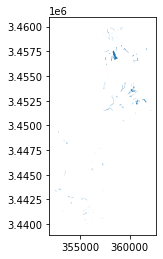

In [6]:
# Make sure that the plots of the resulting shapefile look the same as that of the prediction shapefile

prediction.plot()

<AxesSubplot:>

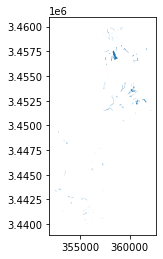

In [7]:
output.plot()